In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
users = pd.read_excel("data-ml-project/data/mobile_app_user_dataset_1.xlsx")
users.head()

/opt/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10
0,Unique ID for each participant,StartDate,EndDate,"0=incomplete response, 1=complete response, 2=...","1=ours, 2=panel",Browser Meta Info-Browser,Browser Meta Info-Version,Browser Meta Info-Operating System,Browser Meta Info-Screen Resolution,Browser Meta Info-Flash Version,...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...
1,1,2012-09-26 07:46:07,2012-09-26 07:46:21,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2012-09-26 07:45:19,2012-09-26 07:56:41,1,1,Safari iPhone,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,...,6,3,7,2,6,3,4,3,4,4
3,3,2012-09-26 07:45:35,2012-09-26 08:01:56,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,...,4,4,5,2,3,3,5,3,5,3
4,4,2012-09-26 16:58:29,2012-09-26 17:05:50,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,...,4,3,6,3,5,5,5,2,5,3


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10209 entries, 0 to 10208
Columns: 161 entries, ID to Q30_10
dtypes: object(161)
memory usage: 12.5+ MB


In [9]:
users.describe()

,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10
count,10209,10209,10209,10209,10209,10040,10036,10040,10040,10040,...,5277,5277,5277,5277,5277,5277,5277,5277,5277,5277
unique,10209,9903,9961,7,3,9,202,150,297,116,...,8,8,8,8,8,8,8,8,8,8
top,Unique ID for each participant,2012-10-23 10:04:59,2012-10-23 12:12:40,1,2,MSIE,9,Windows NT 6.1,1366x768,11.4.402.287,...,4,4,6,4,6,4,6,2,6,2
freq,1,3,3,4824,9818,4302,2396,4904,2027,2739,...,1239,1230,1584,1147,1410,1228,1631,1466,1381,1192


In [11]:
users = users.drop(index=0)
users.head(5)

,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10
1,1,2012-09-26 07:46:07,2012-09-26 07:46:21,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2012-09-26 07:45:19,2012-09-26 07:56:41,1,1,Safari iPhone,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,...,6,3,7,2,6,3,4,3,4,4
3,3,2012-09-26 07:45:35,2012-09-26 08:01:56,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,...,4,4,5,2,3,3,5,3,5,3
4,4,2012-09-26 16:58:29,2012-09-26 17:05:50,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,...,4,3,6,3,5,5,5,2,5,3
5,5,2012-09-27 04:16:04,2012-09-27 04:24:56,1,1,Chrome,22.0.1229.79,Intel Mac OS X 10_7_4,1280x800,11.4.402,...,2,6,4,3,6,5,7,3,5,3


In [13]:
print(users['Q3_1_TEXT'].isnull().sum())

2310


In [15]:
users['Q3_1_TEXT'].astype(str).replace(to_replace=["nan", "None"], value=(0))
users['Q3_1_TEXT'].head(50)

1               NaN
2        Apple Inc.
3              iPad
4           Samsung
5             apple
6           I phone
7             Apple
8     Sony Ericsson
9             Apple
10            docmo
11              HTC
12          Samsung
13    Sony Ericsson
14              NaN
15              NaN
16          Samsung
17           iPhone
18    Sony Ericsson
19            Apple
20              HTC
21              HTC
22            Nokia
23          Samsung
24              NaN
25          Samsung
26              htc
27            Apple
28            NOKIA
29            Nokia
30              NaN
31            Nokia
32          Samsung
33          samsung
34       blackberry
35            Nokia
36              HTC
37            Nokia
38              HTC
39            apple
40               LG
41    Sony Ericsson
42          Samsung
43          Alcatel
44          Samsung
45             sony
46              ZTE
47            Nokia
48            Nokia
49    Sony-Ericsson
50            Nokia


In [17]:
users['Q3_1_TEXT'] = users['Q3_1_TEXT'].str.lower()
users['Q3_1_TEXT'].unique()

array([nan, 'apple inc.', 'ipad', 'samsung', 'apple', 'i phone',
       'sony ericsson', 'docmo', 'htc', 'iphone', 'nokia', 'blackberry',
       'lg', 'alcatel', 'sony', 'zte', 'sony-ericsson', 'huawei',
       'nokia 1100', 'android', 'motorola', 'rim', 'sumsung', 'nec',
       'pantech', '京セラ', '富士通', 'sonyericsson', 'htc, asus', 'サムスン',
       'moto', 'sumsang', 'zenithink', 'asus', 'appel', 'самсунг', '三星',
       'blacberry', 'нокия', '苹果', 'open mobile', 'samsung/google', 'e71',
       'montecarlo', 'моторола', '诺基亚', 'porches design', '酷派', 'sansung',
       'sony ericson', 'apple iphone', 'telstra', 'acer', 'samsumg',
       'iphon', 'htf', 'eze-key', 'docomo', 'tim', 'acme', 'au', 'パナソニック',
       'ソフトバンク', 'nvsbl', 'toshiba', 'sharp', 'black berry', '東芝',
       'venko', 'sony erikson', 'ドコモ', 'ntt', '삼성', 'アップル', 'シャープ',
       'nttドコモ', '애플', 'キョウセラ', '分からない', 'chaina', 'サムソン',
       'nokia celular', 'siemens', 'hp', 'ぱなそにっく', '摩托罗拉', 'カシオ',
       'самсунг, нокия', 'vodap

In [19]:
brand_mapped = np.array([
    np.nan, 'apple inc.', 'ipad', 'samsung', 'apple', 'i phone', 'sony ericsson', 
    'docmo', 'htc', 'iphone', 'nokia', 'blackberry', 'lg', 'alcatel', 'sony', 
    'zte', 'sony-ericsson', 'huawei', 'nokia 1100', 'android', 'motorola', 'rim', 
    'sumsung', 'nec', 'pantech', '京セラ', '富士通', 'sonyericsson', 'htc, asus', 
    'サムスン', 'moto', 'sumsang', 'zenithink', 'asus', 'appel', 'самсунг', 
    '三星', 'blacberry', 'нокия', '苹果', 'open mobile', 'samsung/google', 'e71', 
    'montecarlo', 'моторола', '诺基亚', 'porches design', '酷派', 'sansung', 
    'sony ericson', 'apple iphone', 'telstra', 'acer', 'samsumg', 'iphon', 'htf', 
    'eze-key', 'docomo', 'tim', 'acme', 'au', 'パナソニック', 'ソフトバンク', 
    'nvsbl', 'toshiba', 'sharp', 'black berry', '東芝', 'venko', 'sony erikson', 
    'ドコモ', 'ntt', '삼성', 'アップル', 'シャープ', 'nttドコモ', '애플', 'キョウセラ', 
    '分からない', 'chaina', 'サムソン', 'nokia celular', 'siemens', 'hp', 'ぱなそにっく', 
    '摩托罗拉', 'カシオ', 'самсунг, нокия', 'vodaphone, apple, android', 'unbekannt',
])


ios_keywords = ['apple', 'iphone', 'ipad', 'ipod', 'mac']
android_keywords = ['android', '三星', 'sansung', 'samsumg', 'sumsung', '삼성', 'samung',
                    'samsang' 'самсунг','huawei', '华为' 'htc', 'lg', 'sony', 'sony ericson', 
                    'ソニー', 'zte', '中兴','シャープ', '京セラ', 'キョウセラ', 'kyocera', '京セラ', 'キョウセラ', 
                    'fujitsu', '富士通', 'nec', 'necカシオ', 'panasonic', 'パナソニック', 'pantech', 'パンテック', 
                    'xiaomi', '小米', 'lenovo', '联想', 'sky', '스카이', 'coolpad', '酷派', 'sagem', 
                    'alcatel', 'micromax', 'asus', 'acer', 'casio', 'カシオ', 'docomo', 'ドコモ', 'sanyo', 'fly'
                    'motorola']

def categorize_entry(entry):
    if pd.isna(entry):
        return 'Other'
    entry = str(entry).lower().strip()  
    if any(keyword in entry for keyword in ios_keywords):
        return 'iOS'
    elif any(keyword in entry for keyword in android_keywords):
        return 'Android'
    else:
        return 'Other'

# Apply to the column
users['Q3_1_TEXT_standardized'] = users['Q3_1_TEXT'].apply(categorize_entry)

# Check the result
print(users[['Q3_1_TEXT', 'Q3_1_TEXT_standardized']].head())

    Q3_1_TEXT Q3_1_TEXT_standardized
1         NaN                  Other
2  apple inc.                    iOS
3        ipad                    iOS
4     samsung                  Other
5       apple                    iOS


In [21]:
users['Q3_1_TEXT_standardized'].value_counts()

Q3_1_TEXT_standardized
Other      7341
Android    1910
iOS         957
Name: count, dtype: int64

In [23]:
users = pd.get_dummies(users, columns=['Q3_1_TEXT_standardized'])
users.head()

,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10,Q3_1_TEXT_standardized_Android,Q3_1_TEXT_standardized_Other,Q3_1_TEXT_standardized_iOS
1,1,2012-09-26 07:46:07,2012-09-26 07:46:21,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False
2,2,2012-09-26 07:45:19,2012-09-26 07:56:41,1,1,Safari iPhone,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,...,2,6,3,4,3,4,4,False,False,True
3,3,2012-09-26 07:45:35,2012-09-26 08:01:56,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,...,2,3,3,5,3,5,3,False,False,True
4,4,2012-09-26 16:58:29,2012-09-26 17:05:50,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,...,3,5,5,5,2,5,3,False,True,False
5,5,2012-09-27 04:16:04,2012-09-27 04:24:56,1,1,Chrome,22.0.1229.79,Intel Mac OS X 10_7_4,1280x800,11.4.402,...,3,6,5,7,3,5,3,False,False,True


In [25]:
behavior_columns = [
    "Q4",  #Q4: Which app store do you use?
    "Q5",  # How frequently do you visit the app store to look for apps?
    "Q6",  # On average, how many apps do you download a month?
    "Q7_1", # When do you look for apps?
    "Q7_2",
    "Q7_3",
    "Q7_4", 
    "Q7_5", 
    #"Q7_6", other
    "Q8_1",  # How do you find apps?
    "Q8_2",
    "Q8_3",
    "Q8_4", 
    #"Q8_6", #missing in survey!!!!
    "Q8_5", 
    "Q8_7",
    "Q8_8", 
    "Q8_9", 
    #"Q8_10", other
     "Q9_1",  # What do you consider when choosing apps to download?
    "Q9_2",
    "Q9_3",
    "Q9_4", 
    "Q9_5", 
    "Q9_7",
    "Q9_8", 
    "Q9_9", 
    "Q9_10",
    "Q9_11",
    "Q9_12",
    #"Q9_13", other
    "Q10_1",  # Why do you download an app?
    "Q10_2",
    "Q10_3",
    "Q10_4", 
    "Q10_5", 
    "Q10_7",
    "Q10_8", 
    "Q10_9", 
    "Q10_10",
    "Q10_11",
    "Q10_12",
    "Q10_13",
    "Q10_14",
    #"Q10_15", other
     "Q14_1",  # What makes you stop using an app?
    "Q14_2",
    "Q14_3",
    "Q14_4", 
    "Q14_5", 
    "Q14_7",
    "Q14_8", 
    "Q14_9", 
    "Q14_10",
    "Q14_11",
    "Q14_12",
    "Q14_13",
    #"Q14_14", other
    "Q14_15",
    "Q15_1",  # Which type of apps do you download?
    "Q15_2",
    "Q15_3",
    "Q15_4", 
    "Q15_5", 
    "Q15_7",
    "Q15_8", 
    "Q15_9", 
    "Q15_10",
    "Q15_11",
    "Q15_12",
    "Q15_13",
    "Q15_14",
    "Q15_15",
    "Q15_16",
    "Q15_17",
    "Q15_18",
    "Q15_19",
    "Q15_20",
    "Q15_21",
    "Q15_22",
    #"Q15_23",
]
"""
Q4
Which app store do you use? - 1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 
4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace,
7=None - my mobile device cannot run apps, 8=I don't know, 9=Other (please specify), 10=I don’t use apps
Q5
How frequently do you visit the app store to look for apps? - 1=Never, 2=Less than once a month, 3=Once a month,
4=More than once a month, 5=Once a week, 6=More than once a week, 7=Once a day, 8=Several times a day, 
9=Other (please specify)
Q6
On average, how many apps do you download a month?
- 1=[0 - 1], 2=[2 - 5], 3=[6 - 10], 4=[11 - 20], 5=[21 - 30], 6=[More than 30]

"""

"\nQ4\nWhich app store do you use? - 1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, \n4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace,\n7=None - my mobile device cannot run apps, 8=I don't know, 9=Other (please specify), 10=I don’t use apps\nQ5\nHow frequently do you visit the app store to look for apps? - 1=Never, 2=Less than once a month, 3=Once a month,\n4=More than once a month, 5=Once a week, 6=More than once a week, 7=Once a day, 8=Several times a day, \n9=Other (please specify)\nQ6\nOn average, how many apps do you download a month?\n- 1=[0 - 1], 2=[2 - 5], 3=[6 - 10], 4=[11 - 20], 5=[21 - 30], 6=[More than 30]\n\n"

In [27]:
users['Q4'].value_counts()

Q4
3     2066
7     1653
1     1169
4      830
8      737
5      722
2      333
6      162
9      150
10      76
Name: count, dtype: int64

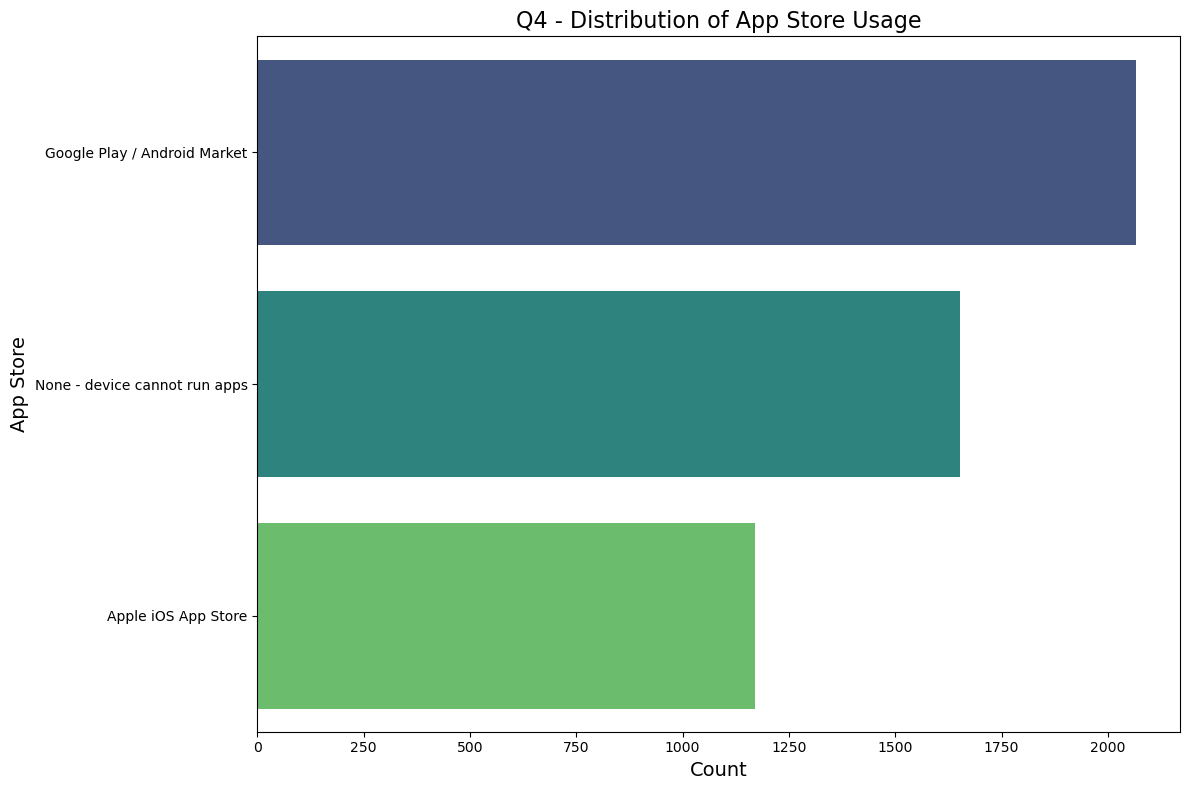

In [29]:
Q4_labels_v1 = {
    1: "Apple iOS App Store",
    3: "Google Play / Android Market",
    7: "None - device cannot run apps",
   
}

Q4_counts_v1 = users['Q4'].value_counts()


Q4_counts_v1.index = Q4_counts_v1.index.map(Q4_labels_v1)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q4_counts_v1.values,
    y=Q4_counts_v1.index,
    hue=Q4_counts_v1.index,  # Assign `y` (app store labels) to `hue`
    palette="viridis",
    dodge=False,  # To avoid overlapping bars
    orient='h'
)

# Add titles and labels
plt.title('Q4 - Distribution of App Store Usage', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('App Store', fontsize=14)

# Remove the legend since it duplicates the y-axis labels
plt.legend([], [], frameon=False)

# Show the plot
plt.tight_layout()
save_fig("Q4_dist_before_cleaning")
plt.show()

In [31]:
# Q4
# Which app store do you use? - 1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 
# 4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace,
# 7=None - my mobile device cannot run apps, 8=I don't know, 9=Other (please specify), 10=I don’t use apps
users['Q4'].describe()

count     7898
unique      10
top          3
freq      2066
Name: Q4, dtype: int64

In [33]:
users['Q3_1_TEXT_standardized_Android'].value_counts()

Q3_1_TEXT_standardized_Android
False    8298
True     1910
Name: count, dtype: int64

In [35]:
users['Q3_1_TEXT_standardized_Other'].value_counts()

Q3_1_TEXT_standardized_Other
True     7341
False    2867
Name: count, dtype: int64

In [37]:
users['Q3_1_TEXT_standardized_iOS'].value_counts()

Q3_1_TEXT_standardized_iOS
False    9251
True      957
Name: count, dtype: int64

In [39]:
null_counts = users[behavior_columns].isnull().sum()
print(null_counts[null_counts > 0])

Q4        2310
Q5        4121
Q6        4121
Q7_1      9903
Q7_2      7959
          ... 
Q15_18    9326
Q15_19    8182
Q15_20    8263
Q15_21    9248
Q15_22    8150
Length: 74, dtype: int64


In [41]:
users[behavior_columns] = users[behavior_columns].fillna(0)

/var/folders/l3/04463r3x53g06h8d9qdk69400000gn/T/ipykernel_48446/4218603422.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  users[behavior_columns] = users[behavior_columns].fillna(0)


In [43]:
print(users[behavior_columns].isnull().sum())

Q4        0
Q5        0
Q6        0
Q7_1      0
Q7_2      0
         ..
Q15_18    0
Q15_19    0
Q15_20    0
Q15_21    0
Q15_22    0
Length: 74, dtype: int64


In [45]:
users['Q4'].value_counts()

Q4
0     2310
3     2066
7     1653
1     1169
4      830
8      737
5      722
2      333
6      162
9      150
10      76
Name: count, dtype: int64

In [47]:
# Q4
# Which app store do you use? - 1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 
# 4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace,
# 7=None - my mobile device cannot run apps, 8=I don't know, 9=Other (please specify), 10=I don’t use apps
users['Q4'].describe()

count    10208.000000
mean         3.478840
std          2.845271
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         10.000000
Name: Q4, dtype: float64

In [49]:
# Key Takeaways

# Google Play is the most commonly used app store (Mode: 3).
# The average preference (Mean: ~4.5) is slightly higher than 4, meaning there is some use of 
# other app stores like Nokia Ovi Store, Samsung Application Store, or less frequent ones.

In [51]:
# Q5
# How frequently do you visit the app store to look for apps? - 1=Never, 2=Less than once a month, 3=Once a month,
# 4=More than once a month, 5=Once a week, 6=More than once a week, 7=Once a day, 8=Several times a day, 
# 9=Other (please specify)
users['Q5'].describe()

count    10208.000000
mean         2.399882
std          2.646578
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max          9.000000
Name: Q5, dtype: float64

In [53]:
users['Q5'].value_counts()

Q5
0    4121
1    1086
2    1022
6    1002
3     675
5     670
4     649
7     531
8     400
9      52
Name: count, dtype: int64

In [55]:
# Q6
# On average, how many apps do you download a month?
# --> 1=[0 - 1], 2=[2 - 5], 3=[6 - 10], 4=[11 - 20], 5=[21 - 30], 6=[More than 30]
users['Q6'].describe()

count    10208.000000
mean         1.163793
std          1.287288
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: Q6, dtype: float64

In [57]:
users['Q6'].value_counts()

Q6
0    4121
1    2574
2    2168
3     735
4     382
5     131
6      97
Name: count, dtype: int64

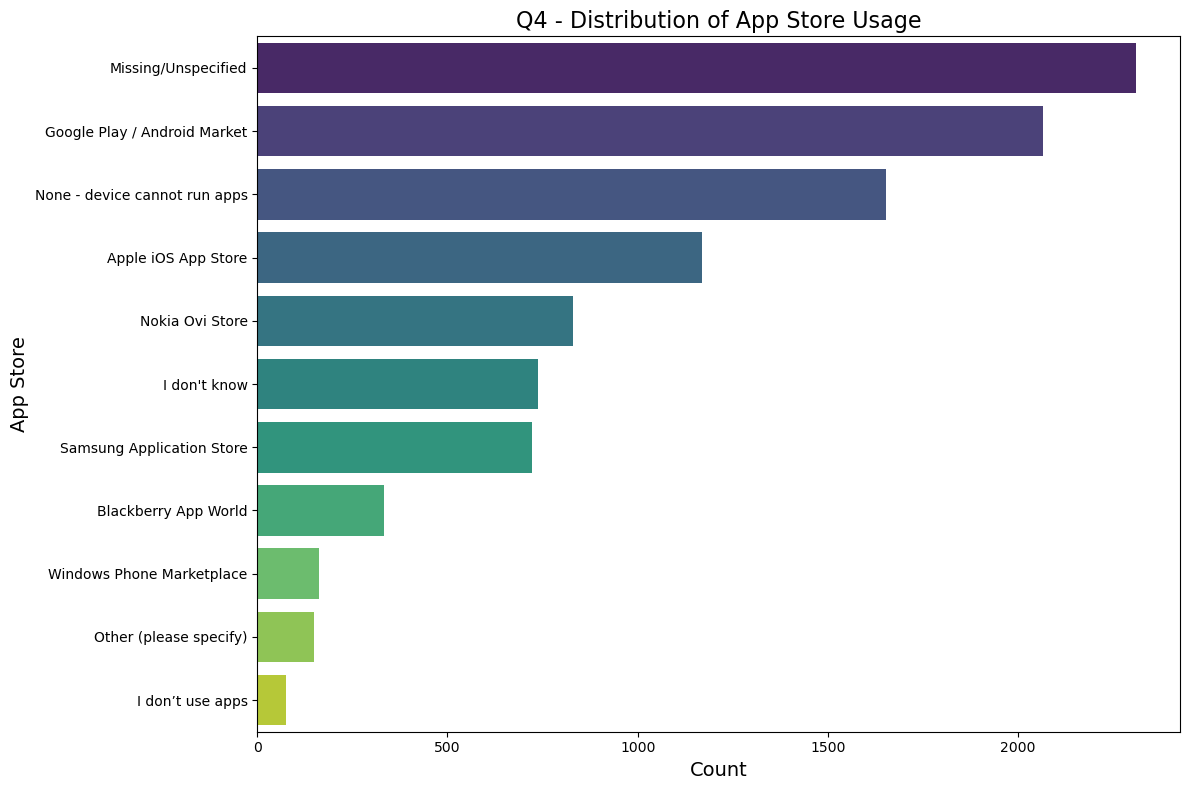

In [59]:
Q4_labels = {
    0: "Missing/Unspecified",
    1: "Apple iOS App Store",
    2: "Blackberry App World",
    3: "Google Play / Android Market",
    4: "Nokia Ovi Store",
    5: "Samsung Application Store",
    6: "Windows Phone Marketplace",
    7: "None - device cannot run apps",
    8: "I don't know",
    9: "Other (please specify)",
    10: "I don’t use apps"
}

Q4_counts = users['Q4'].value_counts()


Q4_counts.index = Q4_counts.index.map(Q4_labels)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q4_counts.values,
    y=Q4_counts.index,
    hue=Q4_counts.index,  # Assign `y` (app store labels) to `hue`
    palette="viridis",
    dodge=False,  # To avoid overlapping bars
    orient='h'
)

# Add titles and labels
plt.title('Q4 - Distribution of App Store Usage', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('App Store', fontsize=14)

# Remove the legend since it duplicates the y-axis labels
plt.legend([], [], frameon=False)

# Show the plot
plt.tight_layout()
save_fig("Q4_distribution_missing_values")
plt.show()

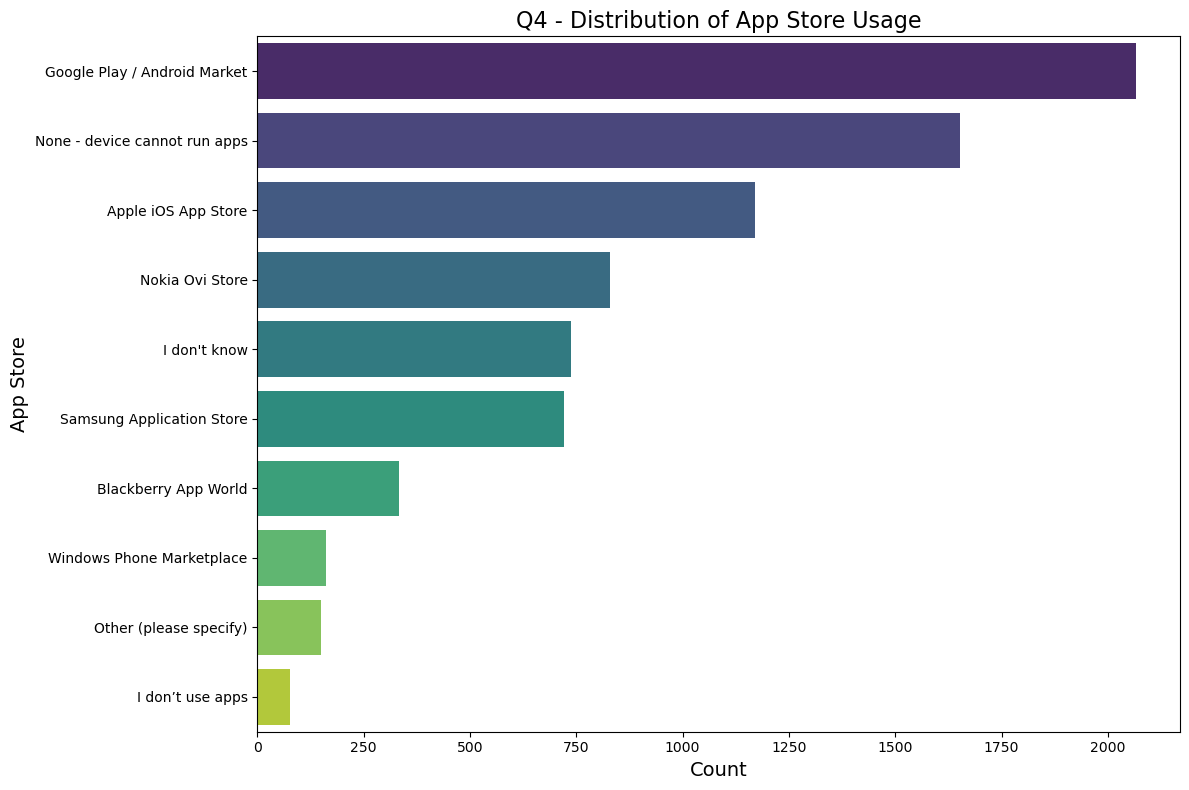

In [61]:
Q4_filtered_counts = Q4_counts[Q4_counts.index != "Missing/Unspecified"]


plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q4_filtered_counts.values,
    y=Q4_filtered_counts.index,
    hue=Q4_filtered_counts.index,  # Assign `y` (app store labels) to `hue`
    palette="viridis",
    dodge=False,  # Avoid bar separation
    orient='h'
)

plt.title('Q4 - Distribution of App Store Usage', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('App Store', fontsize=14)

# Remove the legend
plt.legend([], [], frameon=False)

# Show the plot
plt.tight_layout()
save_fig("Q4_distribution")
plt.show()

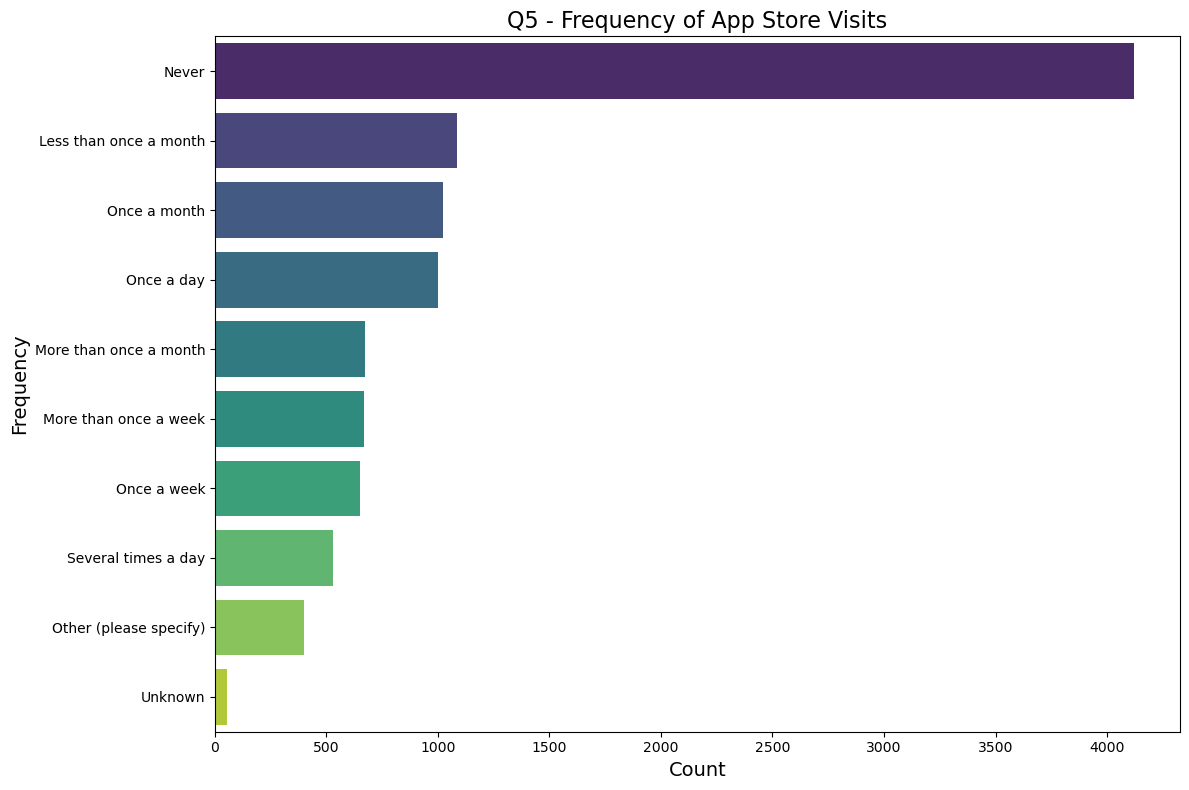

In [63]:
Q5_labels = {
    0: "Never",
    1: "Less than once a month",
    2: "Once a month",
    3: "More than once a month",
    4: "Once a week",
    5: "More than once a week",
    6: "Once a day",
    7: "Several times a day",
    8: "Other (please specify)",
    9: "Unknown"
}

Q5_counts = users['Q5'].value_counts()
Q5_counts.index = Q5_counts.index.map(Q5_labels)

# Remove NaN values (if any exist)
Q5_counts = Q5_counts.dropna()


plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q5_counts.values,
    y=Q5_counts.index,
    hue=Q5_counts.index,  # Assign `y` to `hue` to color each bar
    palette="viridis",
    dodge=False,
    orient='h'
)

# Add titles and labels
plt.title('Q5 - Frequency of App Store Visits', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Remove the legend
plt.legend([], [], frameon=False)

# Show the plot
plt.tight_layout()
#save_fig("Q5_dist_frequency_App_Store")
plt.show()

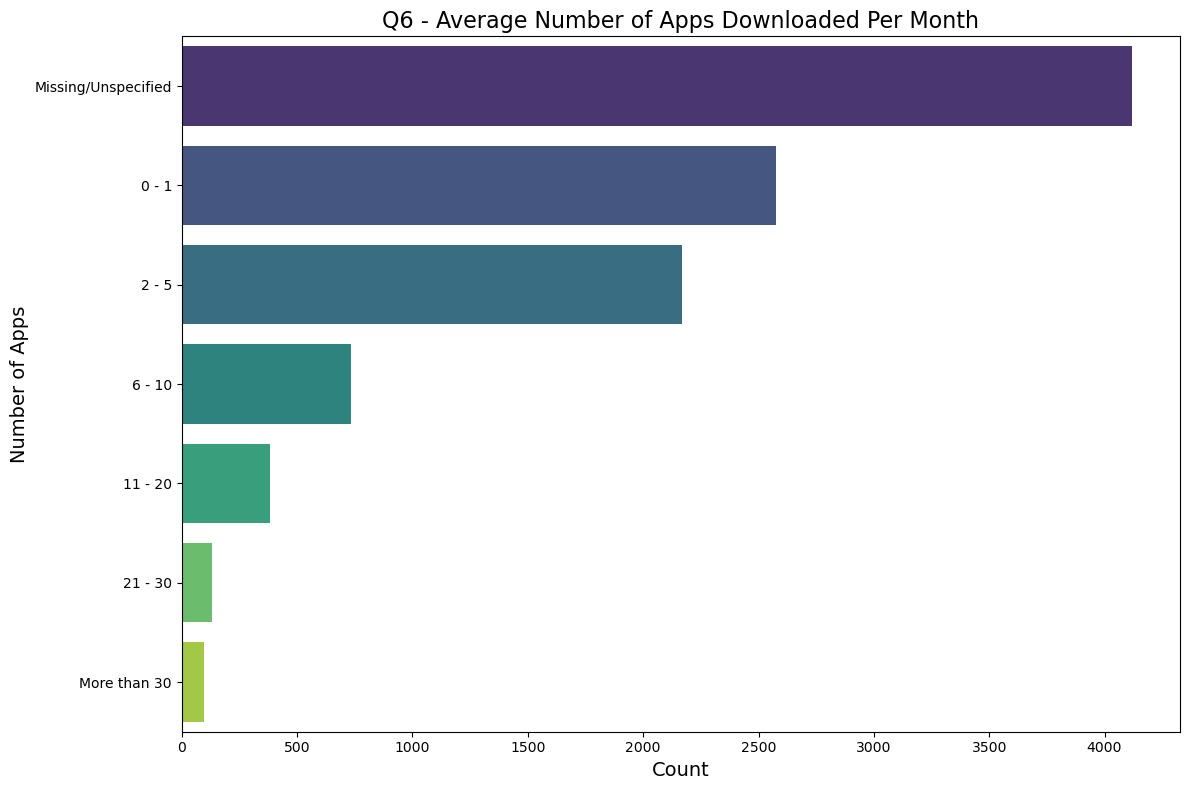

In [65]:
Q6_labels = {
    0: "Missing/Unspecified",
    1: "0 - 1",
    2: "2 - 5",
    3: "6 - 10",
    4: "11 - 20",
    5: "21 - 30",
    6: "More than 30"
}

# Replace numerical categories with descriptive labels
Q6_count = users['Q6'].value_counts()
Q6_count.index = Q6_count.index.map(Q6_labels)

# Remove the "Missing/Unspecified" category
#Q6_counts = Q6_counts.drop("Missing/Unspecified")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q6_count.values,
    y=Q6_count.index,
    hue=Q6_count.index,  # Assign `y` to `hue` to color each bar
    palette="viridis",
    dodge=False,
    orient='h'
)

# Add titles and labels
plt.title('Q6 - Average Number of Apps Downloaded Per Month', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)

# Remove the legend
plt.legend([], [], frameon=False)

# Show the plot
plt.tight_layout()
#save_fig("Q6_avg_numb_apps_per_month")
plt.show()

In [67]:
users[['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5','Q7_6']].value_counts()

Q7_1  Q7_2  Q7_3  Q7_4  Q7_5  Q7_6
0     0     0     0     0     1       54
            1     1     0     1       10
      1     0     0     0     1        9
            1     1     1     1        6
      0     1     0     0     1        5
            0     1     0     1        4
      1     0     1     1     1        3
      0     0     0     1     1        2
            1     1     1     1        2
      1     0     0     1     1        2
            1     0     0     1        2
                        1     1        2
1     1     1     1     1     1        2
0     0     0     1     1     1        1
            1     0     1     1        1
Name: count, dtype: int64

In [69]:
users['Q7_1'].value_counts()

Q7_1
0    9903
1     305
Name: count, dtype: int64

In [71]:
users['Q7_2'].value_counts()

Q7_2
0    7959
1    2249
Name: count, dtype: int64

In [73]:
users['Q7_3'].value_counts()

Q7_3
0    7788
1    2420
Name: count, dtype: int64

In [75]:
users['Q7_4'].value_counts()

Q7_4
0    7303
1    2905
Name: count, dtype: int64

In [77]:
users['Q7_5'].value_counts()

Q7_5
0    7122
1    3086
Name: count, dtype: int64

In [79]:
users['Q7_6'].value_counts()

Q7_6
1    105
Name: count, dtype: int64

In [81]:
Q7_combined = users[['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5']]

# Flatten the columns into a single series
Q7_flat = Q7_combined.values.flatten()

# Get counts for each possible value
Q7_value_counts = pd.Series(Q7_flat).value_counts()
print(Q7_value_counts)

0    40075
1    10965
Name: count, dtype: int64


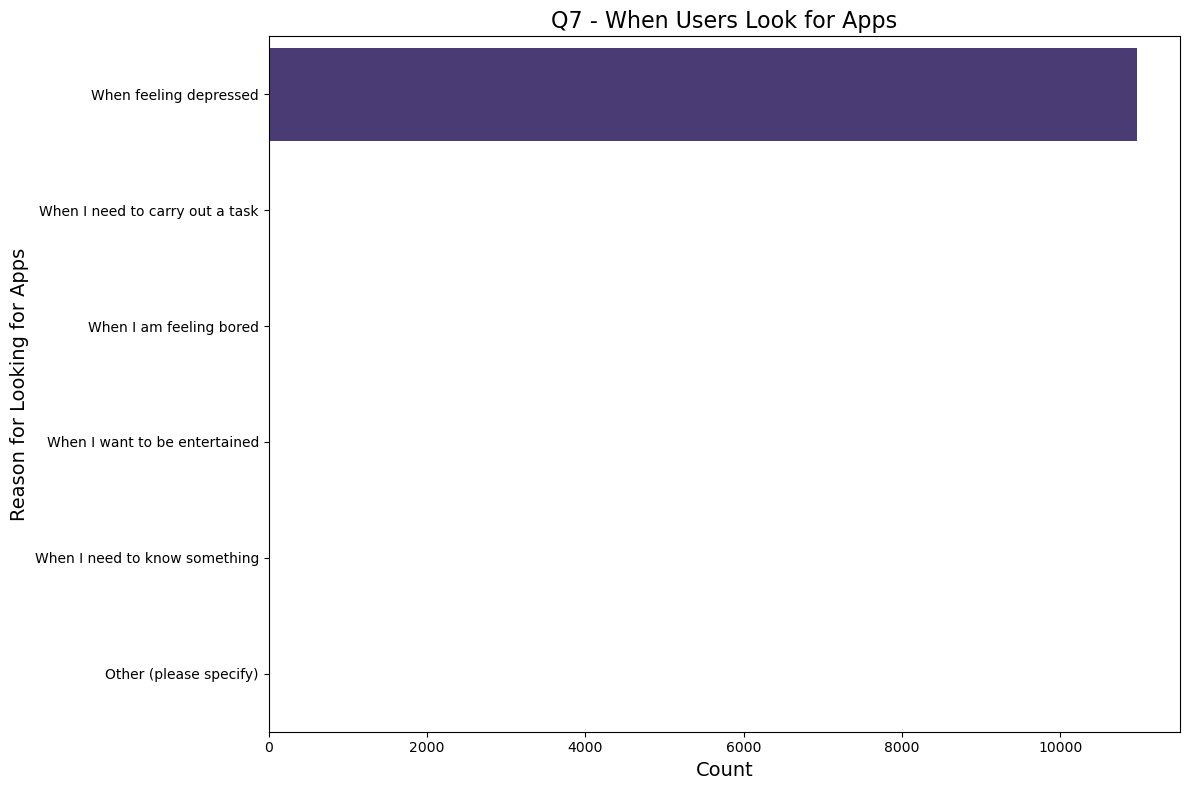

In [83]:
Q7_labels = {
    1: "When feeling depressed",
    2: "When I need to carry out a task",
    3: "When I am feeling bored",
    4: "When I want to be entertained",
    5: "When I need to know something",
    6: "Other (please specify)"
}

# Count how many times each answer (1 to 6) is selected across the columns
Q7_combined = users[['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5']]

# Reshape the data to count selections across these columns
Q7_flat = Q7_combined.values.flatten()
Q7_counts = pd.Series(Q7_flat).value_counts()


# Ensure all values from 1 to 6 are in the count (even if they are 0)
Q7_counts = Q7_counts.reindex(range(1, 7), fill_value=0)

# Map numbers to the labels
Q7_counts.index = Q7_counts.index.map(Q7_labels)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q7_counts.values,
    y=Q7_counts.index,
    palette="viridis",
    hue=Q7_counts.index,  # Assign the y variable to hue
    legend=False,  # Disable legend
    orient='h'
)

# Add titles and labels
plt.title('Q7 - When Users Look for Apps', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Reason for Looking for Apps', fontsize=14)

# Show the plot
plt.tight_layout()
#save_fig("Q7 - When Users Look for Apps")
plt.show()

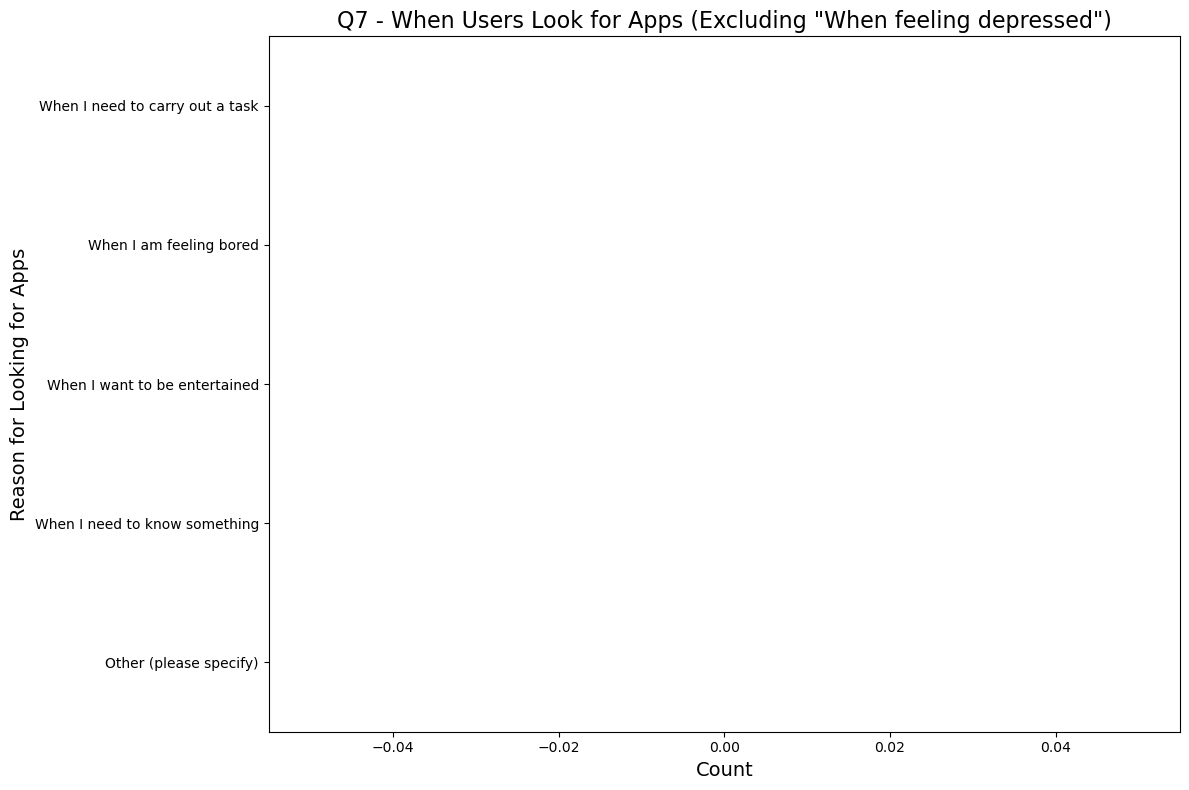

In [85]:
# Ensure we are working with the right set of counts, including missing values
Q7_counts = Q7_counts.reindex(range(1, 7), fill_value=0)

# Drop the value 1 if it exists in the counts (this avoids the KeyError)
Q7_counts = Q7_counts[Q7_counts.index != 1]

# Map the remaining counts to their labels
Q7_counts.index = Q7_counts.index.map(Q7_labels)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q7_counts.values,
    y=Q7_counts.index,
    palette="viridis",
    hue=Q7_counts.index,
    orient='h'
)

# Add titles and labels
plt.title('Q7 - When Users Look for Apps (Excluding "When feeling depressed")', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Reason for Looking for Apps', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [87]:
users[['Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_7', 'Q8_8', 'Q8_9']].value_counts()

Q8_1  Q8_2  Q8_3  Q8_4  Q8_5  Q8_7  Q8_8  Q8_9
0     0     0     0     0     0     0     0       4690
                                          1        527
                        1     0     0     0        469
                        0     1     0     0        447
                  1     0     0     0     0        249
                                                  ... 
1     1     1     0     0     0     0     1          1
                                    1     0          1
                              1     0     0          1
            0     0     0     0     1     1          1
0     1     0     0     1     0     1     1          1
Name: count, Length: 242, dtype: int64

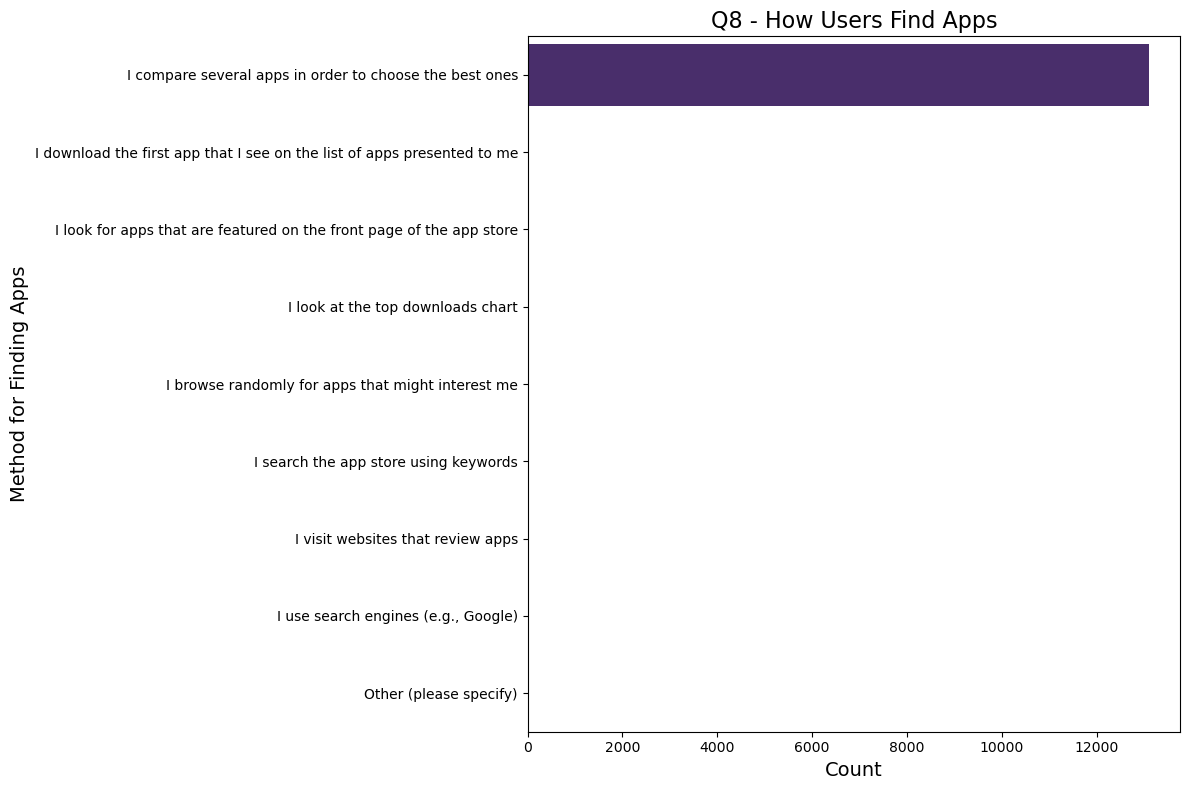

In [89]:
Q8_labels = {
    1: "I compare several apps in order to choose the best ones",
    2: "I download the first app that I see on the list of apps presented to me",
    3: "I look for apps that are featured on the front page of the app store",
    4: "I look at the top downloads chart",
    5: "I browse randomly for apps that might interest me",
    6: "I search the app store using keywords",
    7: "I visit websites that review apps",
    8: "I use search engines (e.g., Google)",
    9: "Other (please specify)"
}

# Count how many times each answer (1 to 9) is selected across the columns
Q8_combined = users[['Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_7', 'Q8_8', 'Q8_9']]

# Flatten the columns into a single series
Q8_flat = Q8_combined.values.flatten()

# Get counts for each possible value (1 to 9)
Q8_counts = pd.Series(Q8_flat).value_counts()

# Ensure all values from 1 to 9 are in the count (even if they are 0)
Q8_counts = Q8_counts.reindex(range(1, 10), fill_value=0)

# Map numbers to the labels
Q8_counts.index = Q8_counts.index.map(Q8_labels)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q8_counts.values,
    y=Q8_counts.index,
    palette="viridis",
    hue=Q8_counts.index, 
    orient='h'
)

# Add titles and labels
plt.title('Q8 - How Users Find Apps', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Method for Finding Apps', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [91]:
users[['Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q9_8', 'Q9_9', 'Q9_10', 'Q9_11', 'Q9_12']].value_counts()

Q9_1  Q9_2  Q9_3  Q9_4  Q9_5  Q9_6  Q9_7  Q9_8  Q9_9  Q9_10  Q9_11  Q9_12
0     0     0     0     0     1     0     0     0     0      0      0        200
                                          1     0     0      0      0         80
                        1     1     0     1     0     0      0      0         77
1     0     0     0     1     1     0     1     1     0      0      0         41
0     0     0     0     1     1     0     0     0     0      0      0         35
                                                                            ... 
      1     1     0     1     1     0     0     1     0      1      0          1
                                                             0      0          1
                                                0     0      1      0          1
                        0     1     1     1     1     0      0      0          1
1     0     0     0     0     1     1     1     1     0      1      1          1
Name: count, Length: 749, dtype: in

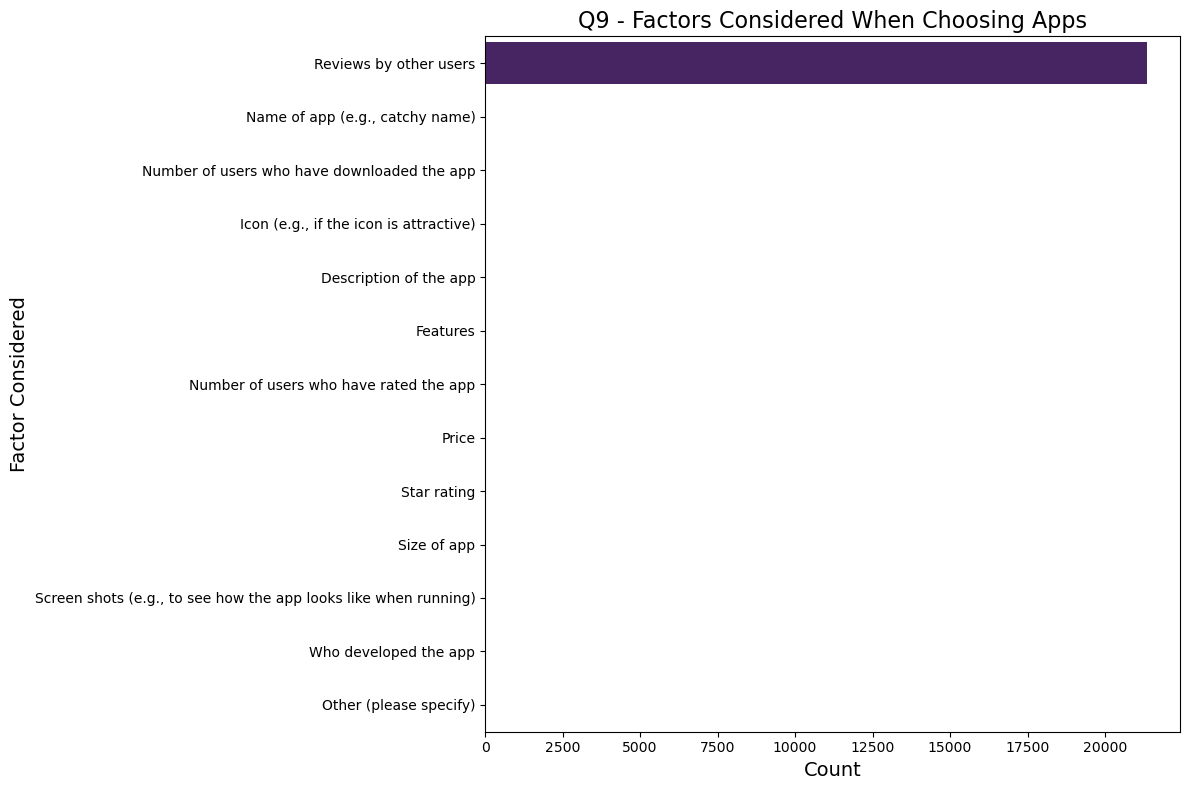

In [93]:
Q9_labels = {
    1: "Reviews by other users",
    2: "Name of app (e.g., catchy name)",
    3: "Number of users who have downloaded the app",
    4: "Icon (e.g., if the icon is attractive)",
    5: "Description of the app",
    6: "Features",
    7: "Number of users who have rated the app",
    8: "Price",
    9: "Star rating",
    10: "Size of app",
    11: "Screen shots (e.g., to see how the app looks like when running)",
    12: "Who developed the app",
    13: "Other (please specify)"
}

# Count how many times each answer (1 to 13) is selected across the columns
Q9_combined = users[['Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q9_8', 'Q9_9', 'Q9_10', 'Q9_11', 'Q9_12']]

# Flatten the columns into a single series
Q9_flat = Q9_combined.values.flatten()

# Get counts for each possible value (1 to 13)
Q9_counts = pd.Series(Q9_flat).value_counts()

# Ensure all values from 1 to 13 are in the count (even if they are 0)
Q9_counts = Q9_counts.reindex(range(1, 14), fill_value=0)

# Map numbers to the labels
Q9_counts.index = Q9_counts.index.map(Q9_labels)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q9_counts.values,
    y=Q9_counts.index,
    palette="viridis",
    hue=Q9_counts.index,
    orient='h'
)

# Add titles and labels
plt.title('Q9 - Factors Considered When Choosing Apps', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Factor Considered', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [95]:
users[['Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10', 'Q10_11', 'Q10_12', 'Q10_13', 'Q10_14']].value_counts()

Q10_1  Q10_2  Q10_3  Q10_4  Q10_5  Q10_6  Q10_7  Q10_8  Q10_9  Q10_10  Q10_11  Q10_12  Q10_13  Q10_14
0      0      0      0      0      1      0      0      0      0       0       0       0       0         26
1      1      1      1      1      1      1      1      1      1       1       1       1       1         22
0      0      1      0      0      1      0      0      0      0       0       0       0       0         13
                                                                               1       0       0          7
              0      0      0      1      0      0      0      0       0       0       1       0          6
                                                                                                         ..
              1      1      0      1      1      1      0      1       1       1       0       0          1
                                                               0       1       1       1       0          1
                                  

/var/folders/l3/04463r3x53g06h8d9qdk69400000gn/T/ipykernel_48446/1681705221.py:37: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


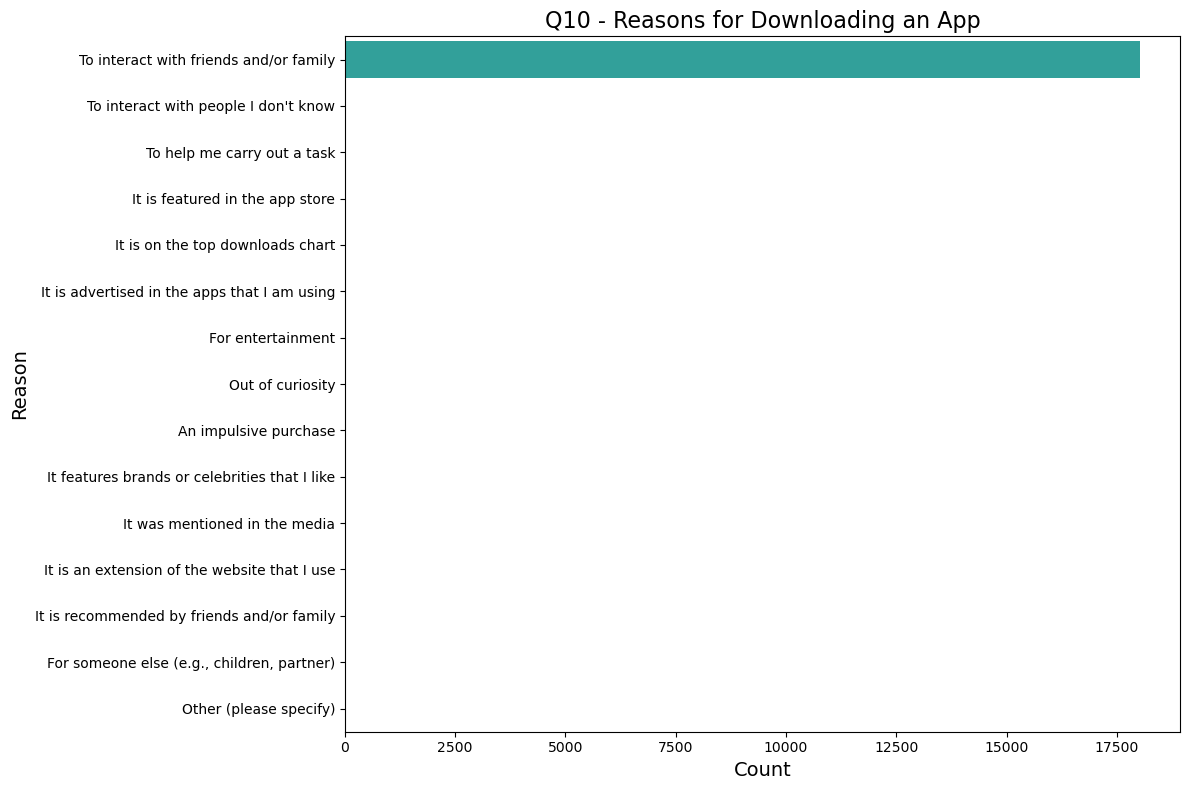

In [97]:
Q10_labels = {
    0: "missing",
    1: "To interact with friends and/or family",
    2: "To interact with people I don't know",
    3: "To help me carry out a task",
    4: "It is featured in the app store",
    5: "It is on the top downloads chart",
    6: "It is advertised in the apps that I am using",
    7: "For entertainment",
    8: "Out of curiosity",
    9: "An impulsive purchase",
    10: "It features brands or celebrities that I like",
    11: "It was mentioned in the media",
    12: "It is an extension of the website that I use",
    13: "It is recommended by friends and/or family",
    14: "For someone else (e.g., children, partner)",
    15: "Other (please specify)"
}

# Count how many times each answer (1 to 15) is selected across the columns
Q10_combined = users[['Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10', 'Q10_11', 'Q10_12', 'Q10_13', 'Q10_14']]

# Flatten the columns into a single series
Q10_flat = Q10_combined.values.flatten()

# Get counts for each possible value (1 to 15)
Q10_counts = pd.Series(Q10_flat).value_counts()

# Ensure all values from 1 to 15 are in the count (even if they are 0)
Q10_counts = Q10_counts.reindex(range(1, 16), fill_value=0)

# Map numbers to the labels
Q10_counts.index = Q10_counts.index.map(Q10_labels)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q10_counts.values,
    y=Q10_counts.index,
    palette=["lightseagreen", "darkcyan"],
    hue=Q10_counts.index,
    orient='h'
)

# Add titles and labels
plt.title('Q10 - Reasons for Downloading an App', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Reason', fontsize=14)

# Show the plot
plt.tight_layout()
save_fig("Q10 - Reasons for Downloading an App")
plt.show()

In [99]:
users[['Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11', 'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15']].value_counts()

Q14_1  Q14_2  Q14_3  Q14_4  Q14_5  Q14_6  Q14_7  Q14_8  Q14_9  Q14_10  Q14_11  Q14_12  Q14_13  Q14_14  Q14_15
0      0      0      0      0      1      1      1      0      1       1       0       0       1       1         1
              1      0      0      1      0      0      0      0       1       0       0       1       0         1
1      1      0      1      0      1      1      0      1      1       0       1       0       1       0         1
              1      0      0      1      0      0      1      0       0       0       0       1       0         1
                     1      0      1      0      1      1      1       1       1       1       1       1         1
Name: count, dtype: int64

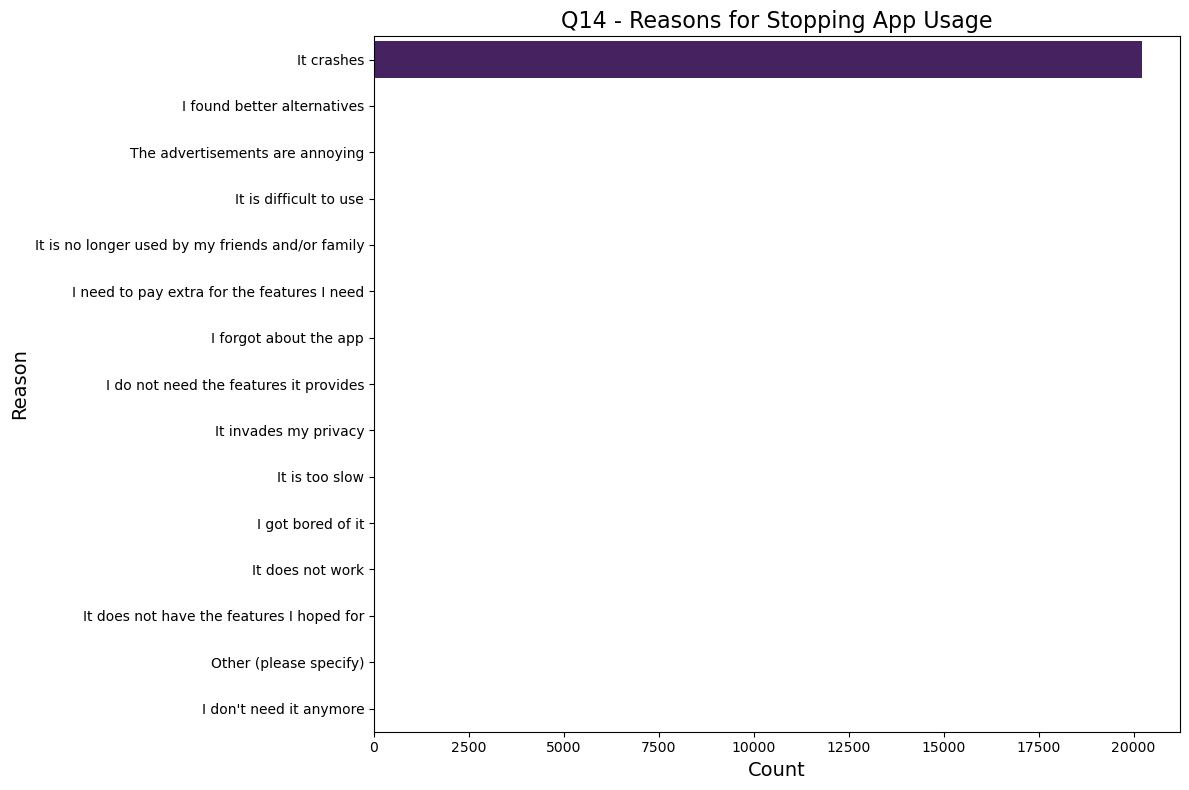

In [101]:
Q14_labels = {
    1: "It crashes",
    2: "I found better alternatives",
    3: "The advertisements are annoying",
    4: "It is difficult to use",
    5: "It is no longer used by my friends and/or family",
    6: "I need to pay extra for the features I need",
    7: "I forgot about the app",
    8: "I do not need the features it provides",
    9: "It invades my privacy",
    10: "It is too slow",
    11: "I got bored of it",
    12: "It does not work",
    13: "It does not have the features I hoped for",
    14: "Other (please specify)",
    15: "I don't need it anymore"
}

# Count how many times each answer (1 to 15) is selected across the columns
Q14_combined = users[['Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11', 'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15']]

# Flatten the columns into a single series
Q14_flat = Q14_combined.values.flatten()

# Get counts for each possible value (1 to 15)
Q14_counts = pd.Series(Q14_flat).value_counts()

# Ensure all values from 1 to 15 are in the count (even if they are 0)
Q14_counts = Q14_counts.reindex(range(1, 16), fill_value=0)

# Map numbers to the labels
Q14_counts.index = Q14_counts.index.map(Q14_labels)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q14_counts.values,
    y=Q14_counts.index,
    palette="viridis",
    hue=Q14_counts.index,
    orient='h'
)

# Add titles and labels
plt.title('Q14 - Reasons for Stopping App Usage', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Reason', fontsize=14)

# Show the plot
plt.tight_layout()
save_fig("Q14 - Reasons for Stopping App Usage")
plt.show()

In [103]:
users[['Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 
       'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q15_16', 'Q15_17',
       'Q15_18', 'Q15_19', 'Q15_20', 'Q15_21', 'Q15_22']].value_counts()

Q15_1  Q15_2  Q15_3  Q15_4  Q15_5  Q15_6  Q15_7  Q15_8  Q15_9  Q15_10  Q15_11  Q15_12  Q15_13  Q15_14  Q15_15  Q15_16  Q15_17  Q15_18  Q15_19  Q15_20  Q15_21  Q15_22
0      0      0      0      0      1      0      0      0      0       0       0       0       0       0       0       0       0       0       0       0       0         40
1      1      1      1      1      1      1      1      1      1       1       1       1       1       1       1       1       1       1       1       1       1         38
0      0      0      0      0      1      0      0      0      0       0       1       0       0       0       0       0       0       0       0       0       1         17
                                                                                                               1       0       0       0       0       0       1         15
                                                                                                               0       0       0       0       0  

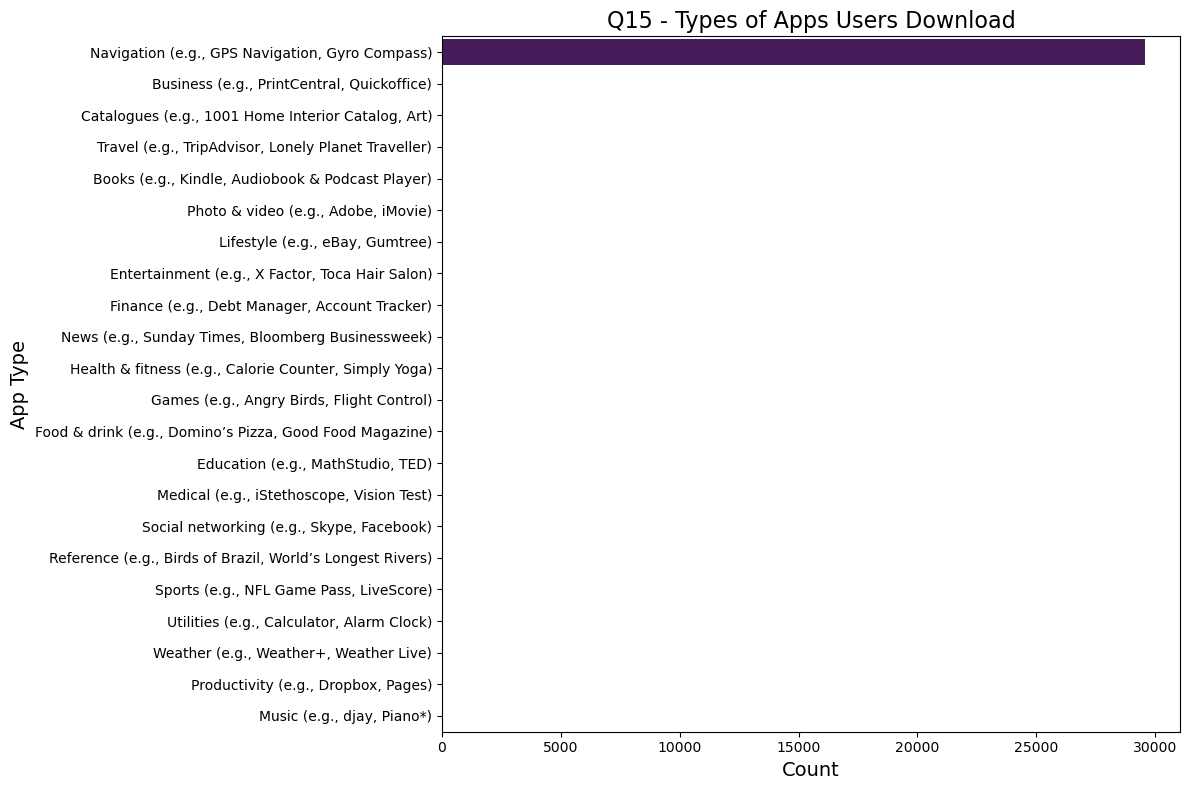

In [105]:
Q15_labels = {
    1: "Navigation (e.g., GPS Navigation, Gyro Compass)",
    2: "Business (e.g., PrintCentral, Quickoffice)",
    3: "Catalogues (e.g., 1001 Home Interior Catalog, Art)",
    4: "Travel (e.g., TripAdvisor, Lonely Planet Traveller)",
    5: "Books (e.g., Kindle, Audiobook & Podcast Player)",
    6: "Photo & video (e.g., Adobe, iMovie)",
    7: "Lifestyle (e.g., eBay, Gumtree)",
    8: "Entertainment (e.g., X Factor, Toca Hair Salon)",
    9: "Finance (e.g., Debt Manager, Account Tracker)",
    10: "News (e.g., Sunday Times, Bloomberg Businessweek)",
    11: "Health & fitness (e.g., Calorie Counter, Simply Yoga)",
    12: "Games (e.g., Angry Birds, Flight Control)",
    13: "Food & drink (e.g., Domino’s Pizza, Good Food Magazine)",
    14: "Education (e.g., MathStudio, TED)",
    15: "Medical (e.g., iStethoscope, Vision Test)",
    16: "Social networking (e.g., Skype, Facebook)",
    17: "Reference (e.g., Birds of Brazil, World’s Longest Rivers)",
    18: "Sports (e.g., NFL Game Pass, LiveScore)",
    19: "Utilities (e.g., Calculator, Alarm Clock)",
    20: "Weather (e.g., Weather+, Weather Live)",
    21: "Productivity (e.g., Dropbox, Pages)",
    22: "Music (e.g., djay, Piano*)",
    23: "Other (please specify)"
}

# Count how many times each answer (1 to 23) is selected across the columns
Q15_combined = users[['Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q15_16', 'Q15_17', 'Q15_18', 'Q15_19', 'Q15_20', 'Q15_21', 'Q15_22']]

# Flatten the columns into a single series
Q15_flat = Q15_combined.values.flatten()

# Get counts for each possible value (1 to 22)
Q15_counts = pd.Series(Q15_flat).value_counts()

# Ensure all values from 1 to 22 are in the count (even if they are 0)
Q15_counts = Q15_counts.reindex(range(1, 23), fill_value=0)

# Map numbers to the labels
Q15_counts.index = Q15_counts.index.map(Q15_labels)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=Q15_counts.values,
    y=Q15_counts.index,
    palette="viridis",
    hue=Q15_counts.index,
    orient='h'
)

# Add titles and labels
plt.title('Q15 - Types of Apps Users Download', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('App Type', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()